In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sps

In [2]:
points = [0, 3, 6, 9]

In [68]:
x_s = []
part_size = 100


for i in points:
    x = sps.uniform.rvs(i, 3, part_size)
    x_s.append(x)

f1 = lambda x: x
f2 = lambda x: 6 - x
f3 = lambda x: x - 6
f4 = lambda x: 12 - x
f_s = [f1, f2, f3, f4]

y_s = []

for x, f in zip(x_s, f_s):
    y_s.append(f(x) + sps.uniform.rvs(size=len(x)))
    
x_s_temp = x_s
x_s = np.array(x_s).ravel()
y_s = np.array(y_s).ravel()

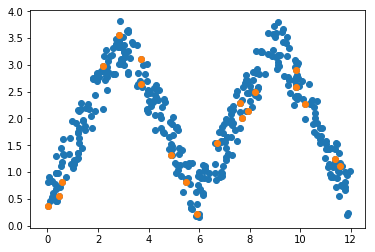

In [74]:
df = pd.DataFrame()
df['x'] = x_s
df['y'] = y_s
df = df.sort_values(by=['x'])
plt.scatter(df['x'], df['y'])
indices = np.array([np.array([0, 1, 2, 3, 4]) + 100 * i for i in range(4)]).ravel()
plt.scatter(x_s[indices], y_s[indices])

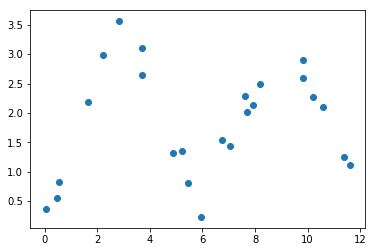

In [5]:
from sklearn.linear_model import LinearRegression

f_s = []
for i in points:
    x = df['x']
    y = df['y']
    mask = np.logical_and(x >= i, x <= i + 3) 
    x = pd.DataFrame(x[mask])
    y = y[mask]
    f_s.append(LinearRegression().fit(x, y))

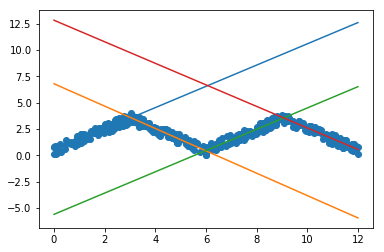

In [66]:
predictions = []

plt.scatter(df['x'], df['y'])

for f in f_s:
    predictions.append(f.predict(df[['x']]))
    plt.plot(df['x'], predictions[-1])



In [12]:
predictions = np.array(predictions)
predictions.shape

(4, 400)

In [13]:
import tensorflow as tf

In [14]:
hello = tf.constant('Hello, TensorFlow!')

# Start tf session
sess = tf.Session()

# Run the op
print(sess.run(hello))

b'Hello, TensorFlow!'


Для начала попробуем чистые нейронки:

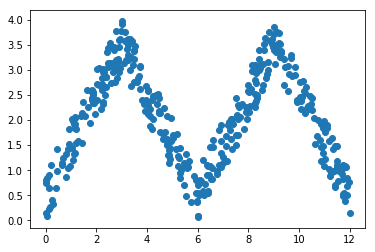

In [16]:
plt.scatter(x_s, y_s)

In [18]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.utils import np_utils

Using TensorFlow backend.


In [19]:
len(x_s)

400

In [46]:
def get_standart_prediction(num_neurons):
    model = Sequential()
    model.add(Dense(num_neurons, input_shape=(1,)))
    model.add(Activation('relu'))
    model.add(Dense(1))
    #model.add(Activation('softmax'))
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(x_s, y_s, epochs=100, batch_size=1, verbose=0)
    return model.predict(x_s)

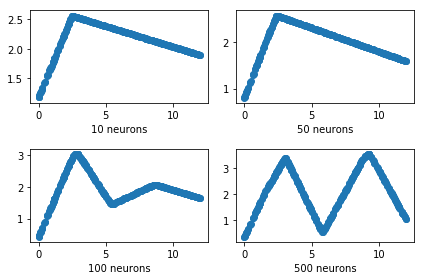

In [62]:
i = 0
for num_neurons in [10, 50, 100, 500]:
    y_pred = get_standart_prediction(num_neurons)
    i += 1
    plt.subplot(2, 2, i)
    plt.scatter(x_s, y_pred)  
    plt.xlabel(str(num_neurons) + ' neurons')
plt.tight_layout()

Видим, что модель хорошо приближается только при достаточно большом кол-ве нейронов.

In [ ]:
A = 

In [63]:

x = tf.Variable(10.0, trainable=True)
f_x = 2 * x* x - 5 *x + 4

loss = f_x
opt = tf.train.GradientDescentOptimizer(0.1).minimize(f_x)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(100):
        print(sess.run([x,loss]))
        sess.run(opt)


[10.0, 154.0]
[6.5, 56.0]
[4.3999996, 20.719995]
[3.1399999, 8.019199]
[2.3839998, 3.4469109]
[1.9303999, 1.8008881]
[1.65824, 1.2083197]
[1.494944, 0.9949951]
[1.3969663, 0.9181981]
[1.3381798, 0.89055157]
[1.302908, 0.88059855]
[1.2817447, 0.8770151]
[1.2690468, 0.8757255]
[1.2614281, 0.87526155]
[1.2568569, 0.87509394]
[1.2541142, 0.87503386]
[1.2524685, 0.87501216]
[1.251481, 0.8750043]
[1.2508886, 0.87500143]
[1.2505331, 0.8750005]
[1.2503198, 0.875]
[1.2501919, 0.87500024]
[1.2501152, 0.87499976]
[1.2500691, 0.875]
[1.2500415, 0.875]
[1.2500249, 0.87500024]
[1.2500149, 0.87500024]
[1.250009, 0.875]
[1.2500054, 0.87500024]
[1.2500032, 0.875]
[1.2500019, 0.875]
[1.2500012, 0.87500024]
[1.2500007, 0.87499976]
[1.2500005, 0.875]
[1.2500002, 0.87500024]
[1.2500001, 0.87500024]
[1.2500001, 0.87500024]
[1.2500001, 0.87500024]
[1.2500001, 0.87500024]
[1.2500001, 0.87500024]
[1.2500001, 0.87500024]
[1.2500001, 0.87500024]
[1.2500001, 0.87500024]
[1.2500001, 0.87500024]
[1.2500001, 0.87500